# NoteBook: Inversión a Largo Plazo en Empresas Americanas No Convencionales (ETL)

## 1. Objetivo

Busqueda de 10 empresas americanas recientes que no sean muy
conocidas, para poder realizar inversiones exitosas a largo plazo.

El citerio de busqueda cumple con los siguientes apartados:

- Empresas de creación posterior al año 2000.
- Empresas que haya pagado dividendos alguna vez en los últimos años.
- Empresas que, actualmente, tenga un PER (Price To Earnings Ratio) inferior a 30.
- Empresas que, actualmente, tenga beneficio por acción (EPS, Earnings Per Share) positivo.

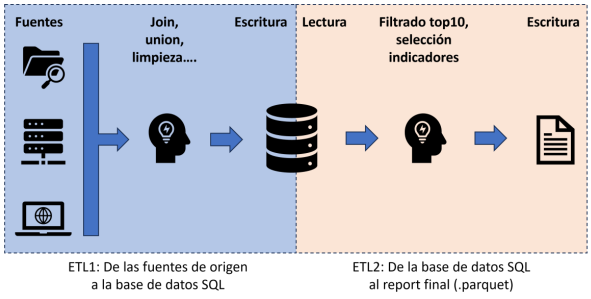

## 2. Extracción de datos

### 2.1 Las empresas de EE. UU. y su información

In [ ]:
!pip install yfinance
!pip intall requests

In [1]:
# CONFIG SELENIUM
%%capture
!apt update
!apt install chromium-chromedriver
!pip install selenium

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import pandas as pd
import requests

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import pandas as pd
import random
import time


# Inicializar un DataFrame vacío para almacenar los datos de todas las páginas
all_pages_df = pd.DataFrame()

pages = [i for i in range(46)]
del pages[0]

for page in pages:
  try:

      chrome_options = Options()
      chrome_options.add_argument("--headless")
      chrome_options.add_argument('--no-sandbox')
      chrome_options.add_argument('--disable-dev-shm-usage')

      service = Service(executable_path="path_to_chromedriver")
      driver = webdriver.Chrome(options=chrome_options)

      sleep_time = random.randint(2, 5)  # Esperar entre 2 y 5 segundos
      time.sleep(sleep_time)

      url = f"https://www.wallstreetzen.com/stock-screener/?t=1&p={page}&f%5Bco%5D=United+States&s=t&sd=asc"

      driver.get(url)
      driver.implicitly_wait(2)

      xpath = "/html/body/div[1]/div[2]/div[1]/table"
      WebDriverWait(driver, 10).until(EC.visibility_of_element_located((By.XPATH, xpath)))

      # Extraer el HTML de la tabla
      html = driver.find_element(By.XPATH, xpath).get_attribute('outerHTML')

      # Analizar el HTML con BeautifulSoup
      soup = BeautifulSoup(html, 'html.parser')
      table = soup.find('table')
      headers = [header.text for header in table.find_all('th')]

      rows = []
      for row in table.find_all('tr')[1:]:  # Ignorar la fila de cabecera
          rows.append([cell.text for cell in row.find_all('td')])

      # Crear el DataFrame para la página actual
      page_df = pd.DataFrame(rows, columns=headers)

      # Concatenar con el DataFrame general
      all_pages_df = pd.concat([all_pages_df, page_df], ignore_index=True)

  except Exception as e:
      print(f"Se produjo un error: {e}")
      driver.quit()

driver.quit()


 #### Conversión de datos en la que hemos cambiado el tipo de dato de 'str' a 'float'.

In [ ]:
df('all_pages_df.csv', index=False)

In [68]:
ruta = '/content/drive/MyDrive/Colab Notebooks/Fundamento_de_la_Ciencia_de_Datos/Ejercicio ETL/all_pages_df.csv'
df_all_pages = pd.read_csv(ruta)

In [69]:
df_all_pages['P/E'] = df_all_pages['P/E'].str.replace('x', '').str.replace(',', '').astype(float)

In [70]:
df_all_pages['P/E'] = df_all_pages['P/E'].fillna(0)

In [ ]:
df_all_pages['Price'] = df_all_pages['Price'].str.replace('$', '').str.replace(',', '').astype(float)

#### El "EPS" o Earnings Per Share (Ganancias por Acción) es una medida de la rentabilidad de una empresa y se calcula dividiendo las ganancias netas de la empresa por el número total de acciones en circulación. Lo calculamos:

In [77]:
df_all_pages['EPS'] = df_all_pages['Price'] / df_all_pages['P/E']

In [130]:
df_all_pages

,Ticker,Company,Exchange,Industry,Zen Score,Market Cap,Price,1d %,EBITDA,P/E,D/E,EPS,employees,foundation
0,A,AGILENT TECHNOLOGIES INC,NYSE,Diagnostics & Research,41,$36.28B,123.99,0.06%,$1.75B,32.37,0.92,3.830399,"18,000",1999
1,AA,ALCOA CORP,NYSE,Aluminum,15,$4.71B,26.38,-0.04%,$44.00M,-5.29,1.74,-4.986767,"13,100",1886
2,AACI,ARMADA ACQUISITION CORP I,NASDAQ,Shell Companies,0,$86.62M,10.73,-0.19%,$814.27k,-536.50,-5.91,-0.020000,NaN,2020
3,AACT,ARES ACQUISITION CORP II,NYSE,Shell Companies,4,$647.50M,10.36,0.00%,NaN,0.00,-1.15,inf,NaN,2021
4,AADI,AADI BIOSCIENCE INC,NASDAQ,Biotechnology,30,$116.50M,4.75,1.50%,-$62.56M,-2.05,0.18,-2.317073,88,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4429,ZVIA,ZEVIA PBC,NYSE,Beverages - Non-Alcoholic,29,$155.52M,2.18,5.83%,-$23.10M,-6.23,0.47,-0.349920,110,2007
4430,ZVRA,ZEVRA THERAPEUTICS INC,NASDAQ,Biotechnology,32,$160.81M,4.44,-1.55%,-$38.67M,-3.86,1.06,-1.150259,34,2006
4431,ZVSA,ZYVERSA THERAPEUTICS INC,NASDAQ,Biotechnology,7,$3.57M,0.08,7.89%,-$98.36M,-0.01,0.67,-8.000000,7,2021
4432,ZWS,ZURN ELKAY WATER SOLUTIONS CORP,NYSE,Pollution & Treatment Controls,31,$5.23B,30.29,2.12%,$280.30M,46.60,0.75,0.650000,"2,700",2006


### 2.2 El año de fundación y el número de empleados extraidos de google finance:

In [6]:

datos_totales = []

for index, row in df_all_pages.iterrows():
  # Obtener el ticker y el exchange de la fila actual
  ticker = row['Ticker']
  exchange = row['Exchange']

  try:
    chrome_options = Options()
    chrome_options.add_argument("--headless")
    chrome_options.add_argument('--no-sandbox')
    chrome_options.add_argument('--disable-dev-shm-usage')
    driver = webdriver.Chrome(options=chrome_options)
    url = f'https://www.google.com/finance/quote/{ticker}:{exchange}'
    driver.get(url)

    # Intentar encontrar el elemento deseado
    elements = driver.find_elements(By.CLASS_NAME, "gyFHrc")
    datos = [element.text for element in elements if element.text]
    datos_totales.append(datos)
    # Aquí puedes hacer algo con 'año_fundacion', como almacenar en una lista o imprimir


  except Exception as e:
    print(f"Se produjo un error con el ticker: {e}")
  finally:
    driver.quit()


In [7]:
datos_fundacion_empleados = []

for lista in datos_totales:
    # Encuentra y procesa los elementos 'FOUNDED' y 'EMPLOYEES'
    fundado = next((item for item in lista if 'FOUNDED' in item), None)
    empleados = next((item for item in lista if 'EMPLOYEES' in item), None)

    # Extrae solo los valores numéricos o relevantes
    fundado = fundado.split('\n')[1] if fundado else None
    empleados = empleados.split('\n')[1] if empleados else None

    # Agrega a la lista de datos
    datos_fundacion_empleados.append([fundado, empleados])

# Crear el DataFrame
df_google_finance = pd.DataFrame(datos_fundacion_empleados, columns=['Fundado', 'Empleados'])

In [8]:
df_google_finance.to_csv('df_google_finance_.csv', index=False)

In [16]:
df_google_finance

,Fundado,Empleados
0,1999,"18,000"
1,1886,"13,100"
2,2020,None
3,2021,None
4,2007,88
...,...,...
4429,2007,110
4430,2006,34
4431,2021,7
4432,2006,"2,700"


Guardamos el Data Frame, además de añadir columnas "employees" y "foundation":

In [21]:
ruta = '/content/drive/MyDrive/Colab Notebooks/Fundamento_de_la_Ciencia_de_Datos/Ejercicio ETL/df_google_finance_.csv'
df_google_finance_ = pd.read_csv(ruta)

In [98]:
df_all_pages['employees'] = df_google_finance_['Empleados']
df_all_pages['foundation'] = df_google_finance_['Fundado']

In [99]:
df_all_pages.to_csv('df.csv', index=False)

In [100]:
ruta = '/content/drive/MyDrive/Colab Notebooks/Fundamento_de_la_Ciencia_de_Datos/Ejercicio ETL/df.csv'
df = pd.read_csv(ruta)

In [101]:
df

,Ticker,Company,Exchange,Industry,Zen Score,Market Cap,Price,1d %,EBITDA,P/E,D/E,EPS,employees,foundation
0,A,AGILENT TECHNOLOGIES INC,NYSE,Diagnostics & Research,41,$36.28B,123.99,0.06%,$1.75B,32.37,0.92,3.830399,"18,000",1999
1,AA,ALCOA CORP,NYSE,Aluminum,15,$4.71B,26.38,-0.04%,$44.00M,-5.29,1.74,-4.986767,"13,100",1886
2,AACI,ARMADA ACQUISITION CORP I,NASDAQ,Shell Companies,0,$86.62M,10.73,-0.19%,$814.27k,-536.50,-5.91,-0.020000,NaN,2020
3,AACT,ARES ACQUISITION CORP II,NYSE,Shell Companies,4,$647.50M,10.36,0.00%,NaN,0.00,-1.15,inf,NaN,2021
4,AADI,AADI BIOSCIENCE INC,NASDAQ,Biotechnology,30,$116.50M,4.75,1.50%,-$62.56M,-2.05,0.18,-2.317073,88,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4429,ZVIA,ZEVIA PBC,NYSE,Beverages - Non-Alcoholic,29,$155.52M,2.18,5.83%,-$23.10M,-6.23,0.47,-0.349920,110,2007
4430,ZVRA,ZEVRA THERAPEUTICS INC,NASDAQ,Biotechnology,32,$160.81M,4.44,-1.55%,-$38.67M,-3.86,1.06,-1.150259,34,2006
4431,ZVSA,ZYVERSA THERAPEUTICS INC,NASDAQ,Biotechnology,7,$3.57M,0.08,7.89%,-$98.36M,-0.01,0.67,-8.000000,7,2021
4432,ZWS,ZURN ELKAY WATER SOLUTIONS CORP,NYSE,Pollution & Treatment Controls,31,$5.23B,30.29,2.12%,$280.30M,46.60,0.75,0.650000,"2,700",2006


# Las 10 mejores empresas para invertir

In [ ]:
import pandas as pd

df['foundation'] = pd.to_datetime(df['foundation'], errors='coerce').dt.year

# Filtrar por compañías fundadas después del año 2000
df_filtrado = df[df['foundation'] > 2000]

# Filtrar por un P/E Ratio inferior a 30
df_filtrado = df_filtrado[df_filtrado['P/E'] < 30]

# Filtrar por un EPS positivo
df_filtrado = df_filtrado[df_filtrado['EPS'] > 0]

In [126]:
df_filtrado

,Ticker,Company,Exchange,Industry,Zen Score,Market Cap,Price,1d %,EBITDA,P/E,D/E,EPS,employees,foundation
3,AACT,ARES ACQUISITION CORP II,NYSE,Shell Companies,4,$647.50M,10.36,0.00%,NaN,0.00,-1.15,inf,NaN,2021.0
6,AAL,AMERICAN AIRLINES GROUP INC,NASDAQ,Airlines,34,$8.05B,12.31,1.48%,$6.56B,4.96,-13.79,2.481855,"132,800",2013.0
14,AAT,AMERICAN ASSETS TRUST INC,NYSE,REIT - Diversified,42,$1.14B,18.76,0.75%,$232.22M,22.60,1.52,0.830088,229,2010.0
22,ABL,ABACUS LIFE INC,NASDAQ,Insurance - Life,41,$451.05M,7.12,9.71%,$53.95M,0.00,0.83,inf,84,2004.0
24,ABNB,AIRBNB INC,NASDAQ,Travel Services,53,$83.67B,129.04,1.75%,$2.89B,15.13,1.35,8.528751,"6,811",2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4290,WHF,WHITEHORSE FINANCE INC,NASDAQ,Asset Management,47,$286.12M,12.31,0.00%,$15.77M,18.10,1.32,0.680110,NaN,2011.0
4350,WTTR,SELECT WATER SOLUTIONS INC,NYSE,Specialty Chemicals,44,$879.41M,7.32,0.41%,$197.25M,13.81,0.40,0.530051,"4,000",2008.0
4365,XCUR,EXICURE INC,NASDAQ,Biotechnology,36,$4.32M,0.50,1.21%,$5.04M,0.30,0.81,1.666667,7,2011.0
4406,YUMC,YUM CHINA HOLDINGS INC,NYSE,Restaurants,41,$18.69B,45.18,-1.59%,$1.98B,24.03,0.73,1.880150,"400,000",2016.0


**Justificación**:
**Market Cap**: Priorizamos la capitalización de mercado porque proporciona una evaluación rápida del tamaño y la influencia de una empresa en su sector. Las empresas con una gran capitalización de mercado suelen tener una mayor estabilidad y poder en sus respectivos mercados.

**P/E** Ratio: Usamos el P/E Ratio como un filtro para asegurarnos de que las empresas seleccionadas no solo son grandes, sino que también están valoradas de manera razonable en relación con sus ganancias.

**EPS**: Al considerar solo empresas con un EPS positivo, nos aseguramos de que las empresas seleccionadas sean rentables, lo que es un indicador clave de salud financiera.

**Zen Score**: Si esta métrica proporciona una visión general del rendimiento y la salud de una empresa, incluirla en nuestro análisis refuerza la selección, ya que consideramos un indicador compuesto además de las métricas financieras individuales.

Este enfoque proporciona un balance entre el tamaño de la empresa (Market Cap), su valoración (P/E Ratio), rentabilidad (EPS) y un posible indicador compuesto de rendimiento (Zen Score). Sin embargo, es importante tener en cuenta que este análisis es bastante simplificado y otras consideraciones podrían ser relevantes dependiendo del contexto específico y los objetivos del análisis. Además, la disponibilidad y exactitud de los datos juegan un papel crucial en la fiabilidad de este tipo de evaluación.







In [128]:

top_companies = df_filtrado.sort_values(by='Market Cap', ascending=False)
top_10_companies = top_companies.head(10)


In [129]:
top_10_companies

,Ticker,Company,Exchange,Industry,Zen Score,Market Cap,Price,1d %,EBITDA,P/E,D/E,EPS,employees,foundation
1279,EARN,ELLINGTON RESIDENTIAL MORTGAGE REIT,NYSE,REIT - Mortgage,35,$99.28M,6.08,0.00%,$3.80M,14.83,8.55,0.409980,170,2012.0
2452,MARX,MARS ACQUISITION CORP,NASDAQ,Shell Companies,14,$98.31M,10.58,0.00%,NaN,0.00,0.00,inf,NaN,2021.0
508,BCSF,BAIN CAPITAL SPECIALTY FINANCE INC,NYSE,Asset Management,42,$974.89M,15.10,-0.26%,$216.05M,7.22,1.27,2.091413,NaN,2015.0
2807,NRP,NATURAL RESOURCE PARTNERS LP,NYSE,Thermal Coal,40,$971.68M,76.91,0.95%,$225.02M,5.10,0.53,15.080392,54,2002.0
387,ATMV,ALPHAVEST ACQUISITION CORP,NASDAQ,Shell Companies,7,$97.77M,10.65,0.00%,NaN,0.00,"2,494.77",inf,NaN,2022.0
2500,MDLZ,MONDELEZ INTERNATIONAL INC,NASDAQ,Confectioners,48,$97.29B,71.49,0.73%,$7.68B,21.34,1.48,3.350047,"91,000",2012.0
485,BBDC,BARINGS BDC INC,NYSE,Credit Services,37,$955.45M,8.97,0.22%,$97.23M,9.97,1.29,0.899699,NaN,2006.0
628,BOWN,BOWEN ACQUISITION CORP,NASDAQ,Shell Companies,14,$94.14M,10.27,0.10%,NaN,0.00,0.17,inf,NaN,2023.0
2532,MGRM,MONOGRAM ORTHOPAEDICS INC,NASDAQ,Medical Devices,7,$93.71M,3.01,-4.14%,NaN,0.00,0.54,inf,27,2016.0
3850,TBMC,TRAILBLAZER MERGER CORP I,NASDAQ,Shell Companies,0,$93.63M,10.38,-0.09%,NaN,0.00,-1.91,inf,NaN,2021.0


Guardamos y descargamos la tabla final en formato parquet:

In [ ]:
!pip install pandas pyarrow
df_filtrado.to_parquet('tabla.parquet')

In [131]:
from google.colab import files
files.download('tabla.parquet')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Guardamos en html:

In [132]:
 %%shell
 jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/Fundamento_de_la_Ciencia_de_Datos/Ejercicio ETL/ETL.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Fundamento_de_la_Ciencia_de_Datos/Ejercicio ETL/ETL.ipynb to html
[NbConvertApp] Writing 747959 bytes to /content/drive/MyDrive/Colab Notebooks/Fundamento_de_la_Ciencia_de_Datos/Ejercicio ETL/ETL.html
